In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import models, layers
import os
import cv2

In [3]:
Flowers = ['Lilly','Lotus','Orchid','Sunflower','Tulip']
path = 'D:\Documentos\Codigo\MachineLearning\Projetos\FlowerType\Dataset'
images = []
labels = []

for folder in Flowers:
    folder_path = os.path.join(path,folder)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path,filename)
            image = cv2.imread(image_path)
            images.append(image)
            labels.append(folder)

In [4]:
for i in range(10):
    print(images[i].shape, labels[i])

(183, 275, 3) Lilly
(996, 1500, 3) Lilly
(640, 960, 3) Lilly
(254, 361, 3) Lilly
(225, 225, 3) Lilly
(183, 275, 3) Lilly
(225, 225, 3) Lilly
(183, 275, 3) Lilly
(628, 1200, 3) Lilly
(183, 276, 3) Lilly


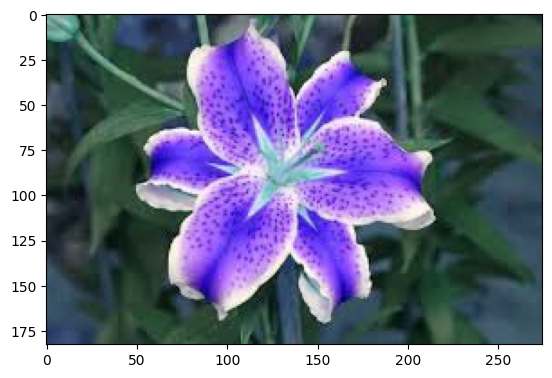

In [5]:
plt.imshow(images[5], cmap=plt.cm.binary)
plt.show()

In [6]:
for image in images:
    images[images.index(image)] = cv2.resize(image,(183,183))

C:\Users\luizt\AppData\Local\Temp\ipykernel_7172\1158609720.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  images[images.index(image)] = cv2.resize(image,(183,183))


In [7]:
for i in range(10):
    print(images[i].shape, labels[i])

(183, 183, 3) Lilly
(183, 183, 3) Lilly
(183, 183, 3) Lilly
(183, 183, 3) Lilly
(183, 183, 3) Lilly
(183, 183, 3) Lilly
(183, 183, 3) Lilly
(183, 183, 3) Lilly
(183, 183, 3) Lilly
(183, 183, 3) Lilly


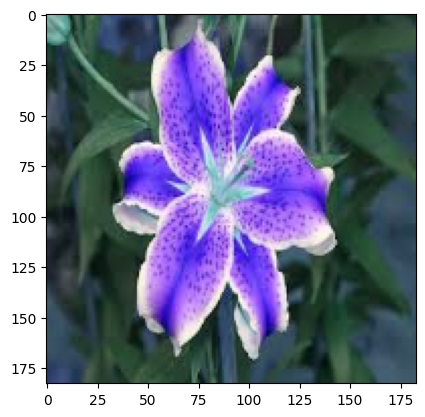

In [8]:
plt.imshow(images[5], cmap=plt.cm.binary)
plt.show()

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(366,(3,3),activation='relu',input_shape=(183,183,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(366,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(366,(3,3),activation='relu'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 181, 181, 366)     10248     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 366)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 88, 88, 366)       1205970   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 44, 44, 366)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 42, 42, 366)       1205970   
                                                                 
Total params: 2,422,188
Trainable params: 2,422,188
Non-

In [11]:
model.add(layers.Flatten())
model.add(layers.Dense(366,activation='relu'))
model.add(layers.Dense(10))

In [12]:
intervalos = [(0,200),(1000,1200),(2000,2200),(3000,3200),(4000,4200)]
images_test = []
labels_test = []

indices_a_remover = set()

for inicio, fim in intervalos:
    images_test.extend(images[inicio:fim])
    labels_test.extend(labels[inicio:fim])
    indices_a_remover.update(range(inicio,fim))

for indice in sorted(indices_a_remover, reverse=True):
    del images[indice]
    del labels[indice]

print(len(images), len(labels), len(images_test), len(labels_test))

4000 4000 1000 1000


In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(images, labels, epochs=10, validation_data=(images_test, labels_test))

ValueError: Failed to find data adapter that can handle input: (<class 'list'> containing values of types {"<class 'numpy.ndarray'>"}), (<class 'list'> containing values of types {"<class 'str'>"})